In [67]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
tables = pd.read_html('https://www.elofootball.com/country.php?countryiso=INT&season=2023-2024')

In [275]:
results = tables[2]

In [276]:
results.columns

Index(['Date', 'Competition', 'Unnamed: 2', 'Home', 'Unnamed: 4', '→',
       'Unnamed: 6', 'Result', 'Probabilities: H', 'D', 'A', 'Away',
       'Unnamed: 12', '→.1', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [277]:
results = results[['Unnamed: 4','Result','Unnamed: 12']]

In [278]:
results.columns = ['Home','Result','Away']

In [279]:
scores = results['Result']

In [280]:
{len(score) for score in scores}

{5}

In [281]:
result_cat = []
for score in scores:
    home = int(score[0])
    away = int(score[-1])
    if home - away < -0.5:
        result_cat.append('C')
    elif home - away > 0.5:
        result_cat.append('A')
    else:
        result_cat.append('B')

In [282]:
results['result_cat'] = result_cat

C:\Users\Usamah\AppData\Local\Temp\ipykernel_11316\1710406872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['result_cat'] = result_cat


In [283]:
results['Delta'] = results.Home - results.Away

C:\Users\Usamah\AppData\Local\Temp\ipykernel_11316\3817589773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Delta'] = results.Home - results.Away


In [284]:
X = results[['Home','Away','Delta']]
y = results['result_cat']

In [285]:
y.value_counts()

result_cat
A    390
C    242
B    172
Name: count, dtype: int64

<Axes: xlabel='Home', ylabel='Away'>

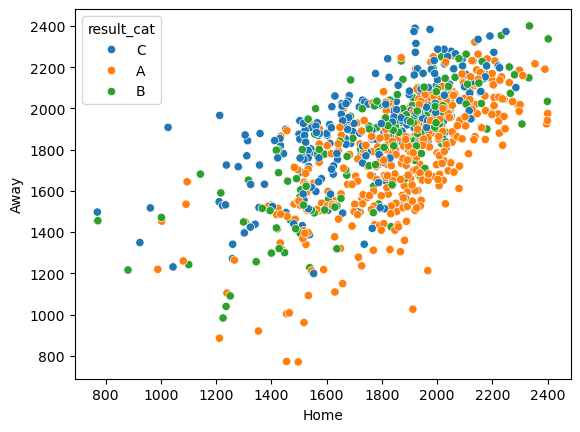

In [286]:
sns.scatterplot(results, x = 'Home', y = 'Away', hue = 'result_cat')

<Axes: xlabel='Delta', ylabel='Count'>

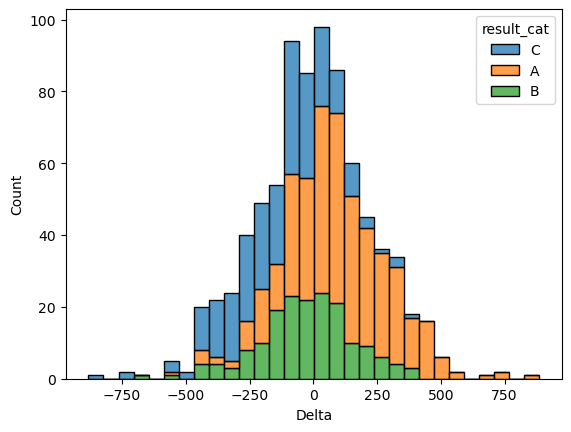

In [287]:
sns.histplot(results, x = 'Delta', hue = 'result_cat', multiple = 'stack')

# Model

In [288]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X, y)

In [289]:
probabilities = clf.predict_proba(X)

In [290]:
probabilities = pd.DataFrame(probabilities)

In [291]:
predictions = clf.predict(X)

In [292]:
probabilities.columns = ['A','B','C']

In [293]:
probabilities['prediction'] = predictions

In [294]:
probabilities['actual'] = y

In [295]:
probabilities

,A,B,C,prediction,actual
0,0.301964,0.220378,0.477658,C,C
1,0.477837,0.235463,0.286701,A,A
2,0.356027,0.228018,0.415955,C,A
3,0.381486,0.241653,0.376861,A,A
4,0.731558,0.160475,0.107967,A,B
...,...,...,...,...,...
799,0.515192,0.257719,0.227089,A,C
800,0.123901,0.228182,0.647917,C,C
801,0.354503,0.280162,0.365335,C,B
802,0.453799,0.275220,0.270981,A,B


<Axes: xlabel='C', ylabel='Count'>

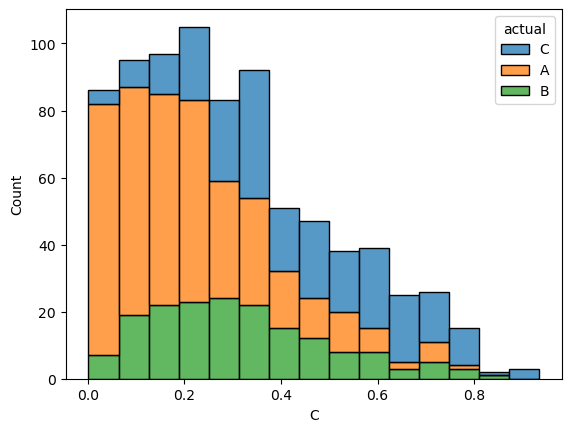

In [303]:
sns.histplot(probabilities, x = 'C', hue = 'actual', multiple = 'stack')

In [300]:
a = 2191
b = 2351

clf.predict_proba(np.array([a,b, a-b]).reshape(1, -1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.30196383, 0.22037802, 0.47765815]])

In [298]:
clf.coef_

array([[ 1.21637193e-03, -1.06851363e-03,  2.28488557e-03],
       [-1.84151459e-04, -1.07478588e-04, -7.66728728e-05],
       [-1.03222047e-03,  1.17599222e-03, -2.20821268e-03]])

In [299]:
pd.concat([results, probabilities], axis = 1)

,Home,Result,Away,result_cat,Delta,A,B,C,prediction,actual
0,2191,0 - 2,2351,C,-160,0.301964,0.220378,0.477658,C,C
1,1996,1 - 0,2012,A,-16,0.477837,0.235463,0.286701,A,A
2,2148,3 - 0,2263,A,-115,0.356027,0.228018,0.415955,C,A
3,1984,2 - 0,2074,A,-90,0.381486,0.241653,0.376861,A,A
4,2265,2 - 2,2073,B,192,0.731558,0.160475,0.107967,A,B
...,...,...,...,...,...,...,...,...,...,...
799,1614,0 - 1,1584,C,30,0.515192,0.257719,0.227089,A,C
800,1423,0 - 1,1760,C,-337,0.123901,0.228182,0.647917,C,C
801,1526,1 - 1,1622,B,-96,0.354503,0.280162,0.365335,C,B
802,1516,0 - 0,1531,B,-15,0.453799,0.275220,0.270981,A,B


In [304]:
import pickle

# Save the object to a file
with open('predictor.pkl', 'wb') as file:
    pickle.dump(clf, file)

print("Object saved successfully!")


Object saved successfully!


# StatsModels

In [71]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with independent variables 'X' and binary target 'y'

# 1. Check linearity of logit for each variable
# Adding a constant for the logit model
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y,X_with_const).fit()
print(logit_model.summary())

# 2. Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# 3. Check for outliers and leverage points
influence = logit_model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [70]:
X_with_const

,const,Home,Away
0,1.0,2191,2351
1,1.0,1996,2012
2,1.0,2148,2263
3,1.0,1984,2074
4,1.0,2265,2073
...,...,...,...
799,1.0,1614,1584
800,1.0,1423,1760
801,1.0,1526,1622
802,1.0,1516,1531
